In [1]:
import os
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u 
from astropy.table import Table

from snewpy.neutrino import Flavor, MassHierarchy, MixingParameters
from snewpy.models import Nakazato_2013
from snewpy.models.ccsn import Fornax_2022
from snewpy.models.ccsn import Bollig_2016
from snewpy.models.ccsn import Sukhbold_2015
from snewpy.flavor_transformation import AdiabaticMSW, NonAdiabaticMSWH, \
                                         TwoFlavorDecoherence, ThreeFlavorDecoherence, \
                                         NeutrinoDecay, AdiabaticMSWes, NonAdiabaticMSWes
from asteria import set_rcparams
from asteria.simulation import Simulation


#set_rcparams()
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
%matplotlib inline

C:\Users\sanya\AppData\Local\Temp\ipykernel_33032\3341702378.py:11: FutureWarning: snewpy.models.Nakazato_2013 is moved to snewpy.models.ccsn.Nakazato_2013
  from snewpy.models import Nakazato_2013


In [2]:
nak_param=params for params in Nakazato_2013.get_param_combinations() if params['progenitor_mass'].value == 20 
                      and params['revival_time'].value==100 and params['metallicity']==.02

SyntaxError: invalid syntax (1916589779.py, line 1)

In [120]:
model = Nakazato_2013(progenitor_mass=20.0*u.solMass,revival_time=100*u.ms,metallicity=.02,eos='shen')

In [122]:
Ea = get_value(np.interp(t, self.time, self.meanE[flavor].to('erg')))
a  = np.interp(t, self.time, self.pinch[flavor])

{'Progenitor mass': <Quantity 20. solMass>,
 'Revival time': <Quantity 100. ms>,
 'Metallicity': 0.02,
 'EOS': 'shen'}

In [3]:
model_a = {'name': 'Nakazato_2013',
            'param': nak_param[0]
              }

In [80]:
sim_i = Simulation(model=model_a,
                     distance=10 * u.kpc, 
                     Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                     tmin=-10*u.s,  tmax=10*u.s,    dt=1*u.ms,
                     mixing_scheme='AdiabaticMSW',
                     hierarchy='inverted')

sim_n = Simulation(model=model_a,
                     distance=10 * u.kpc, 
                     Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                     tmin=-10*u.s,tmax=10*u.s, dt=1*u.ms,
                     mixing_scheme='AdiabaticMSW',
                     hierarchy='normal')

sim_i.run()
sim_n.run()

Text(0, 1, 'Total Signal')

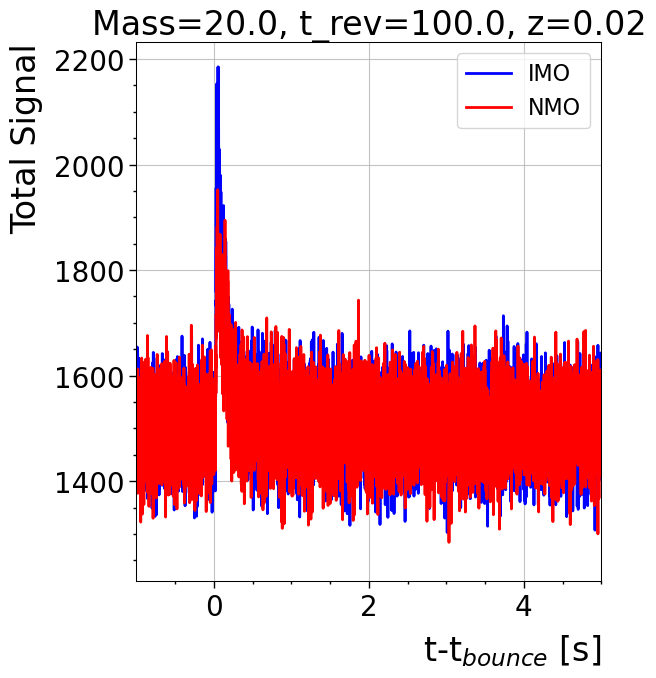

In [104]:
dt=1*u.ms
colors=['blue','red','green','orange']
labels=['IMO','NMO']
for j,simm in enumerate([sim_i,sim_n]):
    #simm.rebin_result(dt)
    t, hits = simm.detector_signal(dt)
    bg = simm.detector.i3_bg(dt, size=hits.size) + simm.detector.dc_bg(dt, size=hits.size)
    plt.step(t, hits+bg, where='post', label=labels[j], lw=2,color=colors[j])
plt.legend()
m=nak_param[0]['progenitor_mass'].value
trev=nak_param[0]['revival_time'].value
z=nak_param[0]['metallicity']
plt.xlim(-1,5)
plt.title('Mass={}, t_rev={}, z={}'.format(m,trev,z))
plt.xlabel(r't-t$_{bounce}$ [s]')
plt.ylabel(fr'Total Signal')

In [85]:
t[9000]

<Quantity -1. s>

Text(0, 1, 'Signal Without Background')

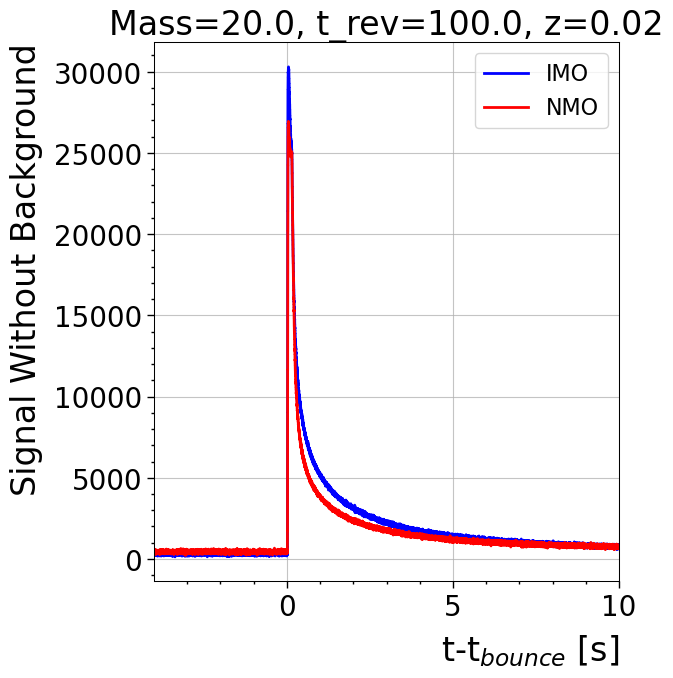

In [119]:
1*u.ms
colors=['blue','red','green','orange']
labels=['IMO','NMO']


for j,simm in enumerate([sim_i,sim_n]):
    #simm.rebin_result(dt)
    simm.scale_result(1*u.kpc)
    t, hits = simm.detector_signal(dt)
    bg = simm.detector.i3_bg(dt, size=hits.size) + simm.detector.dc_bg(dt, size=hits.size)
    sig=hits+bg
    back_sig=np.append(sig[5000:9000],sig[15000:19000])
    mean_under=np.mean(back_sig)
    sub_sig=np.subtract(sig,mean_under)
    plt.step(t, sub_sig, where='post', label=labels[j], lw=2,color=colors[j])

plt.legend()
m=nak_param[0]['progenitor_mass'].value
trev=nak_param[0]['revival_time'].value
z=nak_param[0]['metallicity']
plt.xlim(-4,10)
plt.title('Mass={}, t_rev={}, z={}'.format(m,trev,z))
plt.xlabel(r't-t$_{bounce}$ [s]')
plt.ylabel(fr'Signal Without Background')

Text(0, 1, 'CDF')

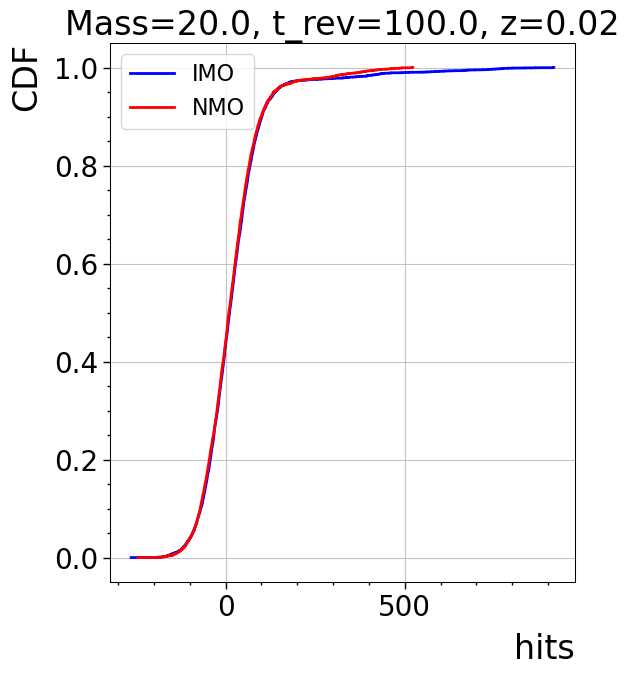

In [127]:
from scipy.integrate import cumtrapz

dt = 1*u.ms
colors=['blue','red','green','orange']
labels=['IMO','NMO']
for j,simm in enumerate([sim_i,sim_n]):
    simm.scale_result(15*u.kpc)
    t, hits = simm.detector_signal(dt)
    bg = simm.detector.i3_bg(dt, size=hits.size) + simm.detector.dc_bg(dt, size=hits.size)
    sig=hits+bg
    back_sig=np.append(sig[5000:9000],sig[14000:18000])
    mean_under=np.mean(back_sig)
    sub_sig=np.subtract(sig,mean_under)
    cut_sig=sub_sig[8000:14000]
    cut_t=t[8000:14000]
    sorted_sig=np.sort(cut_sig)
    cdf_hits = np.arange(1, len(sorted_sig) + 1) / len(sorted_sig)
    plt.step(sorted_sig, cdf_hits, where='post', label=labels[j], lw=2,color=colors[j])
    
plt.legend()
m=nak_param[0]['progenitor_mass'].value
trev=nak_param[0]['revival_time'].value
z=nak_param[0]['metallicity']
plt.title('Mass={}, t_rev={}, z={}'.format(m,trev,z))
plt.xlabel('hits')
plt.ylabel('CDF')

In [107]:
from scipy.integrate import cumtrapz
from scipy import stats


dt = 1*u.ms
colors=['blue','red','green','orange']
labels=['IMO','NMO']
cdfs=[]

for j,simm in enumerate([sim_i,sim_n]):
    simm.scale_result(10*u.kpc)
    t, hits = simm.detector_signal(dt)
    np.random.seed(32) #SET RANDOM SEED!!!!!
    bg = simm.detector.i3_bg(dt, size=hits.size) + simm.detector.dc_bg(dt, size=hits.size)
    sig=hits+bg
    back_sig=np.append(sig[5000:9000],sig[14000:18000])
    mean_under=np.mean(back_sig)
    sub_sig=np.subtract(sig,mean_under)
    cut_sig=sub_sig[8000:14000]
    cut_t=t[8000:14000]
    sorted_sig=np.sort(cut_sig)
    cdf_hits = np.arange(1, len(sorted_sig) + 1) / len(sorted_sig)
    cdfs.append(sorted_sig)
        
statistic, p_value = stats.ks_2samp(cdfs[0], cdfs[1], alternative='two-sided', mode='auto')
p_vals.append(p_value)

print("KS Statistic:", statistic)
print("P-value:", p_value)

KS Statistic: 0.03966666666666667
P-value: 0.000158586642284442


KS Statistic: 0.07833333333333334
P-value: 0.050326003132531404


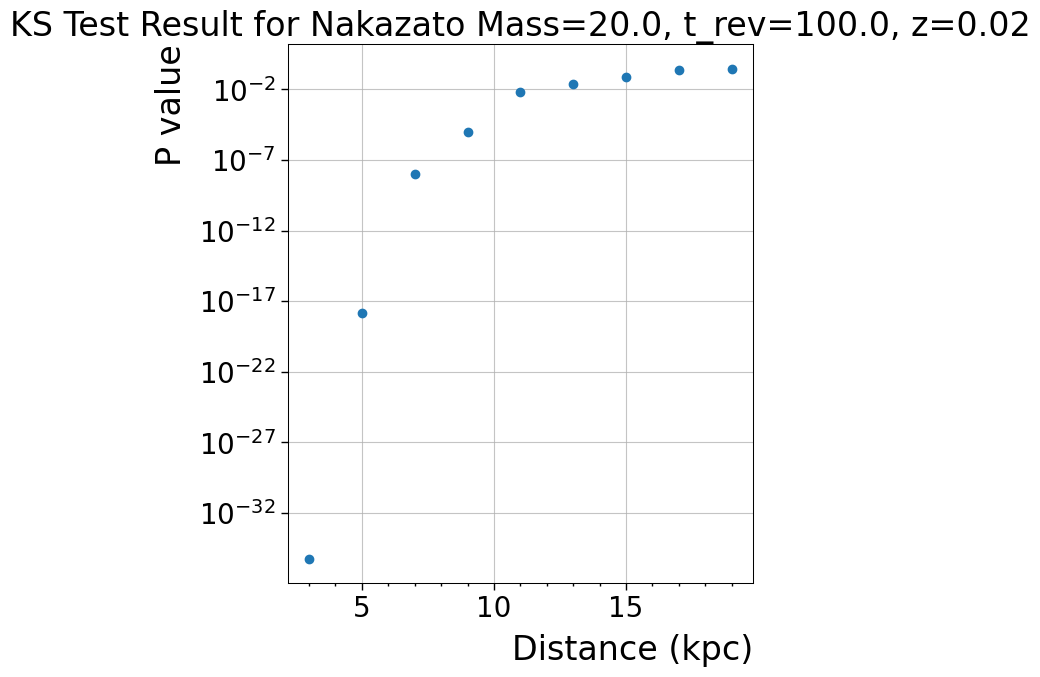

In [124]:
from scipy.integrate import cumtrapz
from scipy import stats


dt = 1*u.ms
colors=['blue','red','green','orange']
labels=['IMO','NMO']
distances=np.arange(3,20,2)
p_means=[]
p_sigmas=[]
np.random.seed(None)

for i,dist in enumerate(distances):
    p_vals=[]
    KS_stats=[]
    for k in range(20):
        cdfs=[]
        for j,simm in enumerate([sim_i,sim_n]):
            simm.scale_result(dist*u.kpc)
            t, hits = simm.detector_signal(dt)
            bg = simm.detector.i3_bg(dt, size=hits.size) + simm.detector.dc_bg(dt, size=hits.size)
            sig=hits+bg
            back_sig=np.append(sig[5000:9000],sig[14000:18000])
            mean_under=np.mean(back_sig)
            sub_sig=np.subtract(sig,mean_under)
            cut_sig=sub_sig[8000:14000]
            cut_t=t[8000:14000]
            sorted_sig=np.sort(cut_sig)
            cdf_hits = np.arange(1, len(sorted_sig) + 1) / len(sorted_sig)
            cdfs.append(sorted_sig)
        
        statistic, p_value = stats.ks_2samp(cdfs[0], cdfs[1], alternative='two-sided', mode='auto')
        p_vals.append(p_value)
    p_means.append(np.mean(p_vals))
    p_sigmas.append(np.std(p_vals))
    
m=nak_param[0]['progenitor_mass'].value
trev=nak_param[0]['revival_time'].value
z=nak_param[0]['metallicity']
plt.title('KS Test Result for Nakazato Mass={}, t_rev={}, z={}'.format(m,trev,z))

plt.errorbar(distances, p_means, fmt='o', capsize=5)
plt.xlabel('Distance (kpc)')
plt.ylabel('P value')
plt.yscale('log')


In [2]:
import numpy as np
from scipy.special import logsumexp, betaln, gammaln
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


def pt_d_sample_test(data1, data2, c=1, max_depth=-1, qdist=norm.ppf, aj=lambda depth: depth**2, log_BF=False):
    old_expressions = np.get_printoptions()['threshold']
    np.set_printoptions(threshold=max(max_depth, old_expressions))

    if max_depth < 0:
        max_depth = max(1, int(np.floor(np.log2(len(data1)) / 2)))

    # Combine datasets and create a group identifier
    binary = np.concatenate((np.zeros(len(data1)), np.ones(len(data2))))
    continuous = np.concatenate((data1, data2))
    data = np.column_stack([scale(continuous), binary])
    X = data[:, 0]  # assign the scaled value to X

    p_H0 = pt_marginal_likelihood(X, low=0, up=1, c=c, depth=1, max_depth=max_depth, qdist=qdist, aj=aj)

    discrete_values = np.unique(binary)

    p_H1 = max([pt_marginal_likelihood(data[data[:, 1] == i, 0], low=0, up=1, c=c, depth=1, max_depth=max_depth, qdist=qdist, aj=aj) +
                pt_marginal_likelihood(data[data[:, 1] != i, 0], low=0, up=1, c=c, depth=1, max_depth=max_depth, qdist=qdist, aj=aj)
                for i in discrete_values])

    n_hypotheses = len(discrete_values)
    logbf = p_H0 - p_H1 + np.log(n_hypotheses)
    np.set_printoptions(threshold=old_expressions)

    if log_BF:
        return logbf
    else:
        bf = np.exp(logbf)
        return bf


def pt_marginal_likelihood(data, low, up, c, depth, max_depth, qdist, aj):
    if depth == max_depth:
        return 0

    if isinstance(low, (int, float)):  # if low is an integer
        n_j = [
            np.sum((qdist(low) < data) & (data <= qdist((low + up) / 2))),
            np.sum((qdist((low + up) / 2) < data) & (data <= qdist(up)))
        ]  # counts the number of data in each interval (2 vector).
    else:
        n_j = [
            np.sum((qdist(low[0]) < data[:, 0]) & (data[:, 0] <= qdist((low[0] + up[0]) / 2)) &
                   (qdist(low[1]) < data[:, 1]) & (data[:, 1] <= qdist((low[1] + up[1]) / 2))),
            np.sum((qdist((low[0] + up[0]) / 2) < data[:, 0]) & (data[:, 0] <= qdist(up[0])) &
                   (qdist(low[1]) < data[:, 1]) & (data[:, 1] <= qdist((low[1] + up[1]) / 2))),
            np.sum((qdist(low[0]) < data[:, 0]) & (data[:, 0] <= qdist((low[0] + up[0]) / 2)) &
                   (qdist((low[1] + up[1]) / 2) < data[:, 1]) & (data[:, 1] <= qdist(up[1]))),
            np.sum((qdist((low[0] + up[0]) / 2) < data[:, 0]) & (data[:, 0] <= qdist(up[0])) &
                   (qdist((low[1] + up[1]) / 2) < data[:, 1]) & (data[:, 1] <= qdist(up[1])))
        ]  # 4 vector 

    if np.sum(n_j) == 0:
        return 0

    a_j = c * aj(depth)

    if len(n_j) == 2:
        logl = betaln(n_j[0] + a_j, n_j[1] + a_j) - betaln(a_j, a_j)  # log of beta function
    else:
        logl = lmbeta(n_j[0] + a_j, n_j[1] + a_j, n_j[2] + a_j, n_j[3] + a_j) - lmbeta(a_j, a_j, a_j, a_j)

    if isinstance(low, (int, float)):
        likelihoods = [
            pt_marginal_likelihood(data, low, (low + up) / 2, c, depth + 1, max_depth, qdist, aj),
            pt_marginal_likelihood(data, (low + up) / 2, up, c, depth + 1, max_depth, qdist, aj)
        ]  # likelihood of subpartitions
    else:
        likelihoods = [
            pt_marginal_likelihood(data, low, (low + up) / 2, c, depth + 1, max_depth, qdist, aj),
            pt_marginal_likelihood(data, (low + up) / 2, up, c, depth + 1, max_depth, qdist, aj),
            pt_marginal_likelihood(data, [low[0], (low[1] + up[1]) / 2], [(low[0] + up[0]) / 2, up[1]],
                                   c, depth + 1, max_depth, qdist, aj),
            pt_marginal_likelihood(data, [(low[0] + up[0]) / 2, low[1]], [up[0], (low[1] + up[1]) / 2],
                                   c, depth + 1, max_depth, qdist, aj)
        ]

    return logl + np.sum(likelihoods)


def lmbeta(*args):
    return np.sum(gammaln(args)) - gammaln(np.sum(args))


def is_discrete(X):
    return np.all(np.isin(X, np.arange(11)))  # evaluates to TRUE only if every element of X lies within the specified range of 0 to 10.


def scale(data):
    return (data - np.mean(data)) / np.std(data)


In [3]:
sukh_param=list(params for params in Sukhbold_2015.get_param_combinations() if params['progenitor_mass'].value == 27 
                      and params['eos']=='LS220')

In [4]:
labels=['normal','nmo','imo']
norms=[]
nmos=[]
imos=[]
sims=[norms,nmos,imos]

for i in range(100):
    for j,lab in enumerate(labels): 
        with open("Sukhbold_eos={}_M={}_mix={}_num={}.pkl".format(sukh_param[0]['eos'], 
                                                                 sukh_param[0]['progenitor_mass'].value,
                                                                 labels[j], i), 'rb') as f:
            mod=pickle.load(f)
        sims[j].append(mod)

In [21]:
bfs10_norm=[]
dt = 2*u.ms

for i in range(100):
    for j in range(100):
        simm_nh=sims[1][i]
        simm_nh.rebin_result(dt)
        simm_nh.scale_result(10*u.kpc)
        
        t, hits1 = simm_nh.detector_signal(dt)
        bg1 = simm_nh.detector.i3_bg(dt, size=hits1.size) + simm_nh.detector.dc_bg(dt, size=hits1.size)
        sig1=bg1+hits1
        
        id1=np.where(t==-5*u.s)[0][0]
        id2=np.where(t==-.5*u.s)[0][0]
        id3=np.where(t==5*u.s)[0][0]
        id4=np.where(t==10*u.s)[0][0]
        id5=np.where(t==0*u.s)[0][0]
        id6=np.where(t==1*u.s)[0][0]
        
        mean_under1=np.mean(np.append(sig1[id1:id2],sig1[id3:id4]))
        data1=np.subtract(sig1,mean_under1)[id5:id6]
        m=np.max(data1)
        norm_data1=data1/m
        
        
        simm_ih=sims[2][j]
        simm_ih.rebin_result(dt)
        simm_ih.scale_result(10*u.kpc)
        t, hits2 = simm_ih.detector_signal(dt)
        bg2 = simm_ih.detector.i3_bg(dt, size=hits2.size) + simm_ih.detector.dc_bg(dt, size=hits2.size)
        sig2=bg2+hits2
        mean_under2=np.mean(np.append(sig2[id1:id2],sig2[id3:id4]))
        data2=np.subtract(sig2,mean_under2)[id5:id6]
        m=np.max(data2)
        norm_data2=data2/m
        
        log_bf = pt_d_sample_test(norm_data1, norm_data2, log_BF=True)
        bfs10_norm.append(log_bf)
        

In [23]:
#np.savez('bayes_unnorm_3kpc',bfs3)
#np.savez('bayes_norm_3kpc',bfs3_norm)
#np.savez('bayes_norm_20kpc',bfs_norm)
#np.savez('bayes_unnorm_20kpc',bfs20)
#np.savez('bayes_unnorm_10kpc',bfs10)
np.savez('bayes_norm_10kpc',bfs10_norm)

In [12]:
bfs3=np.load('bayes_unnorm_3kpc.npz')['arr_0']
bfs3_norm=np.load('bayes_norm_3kpc.npz')['arr_0']
bfs_norm=np.load('bayes_norm_20kpc.npz')['arr_0']

(-200.0, 10.0)

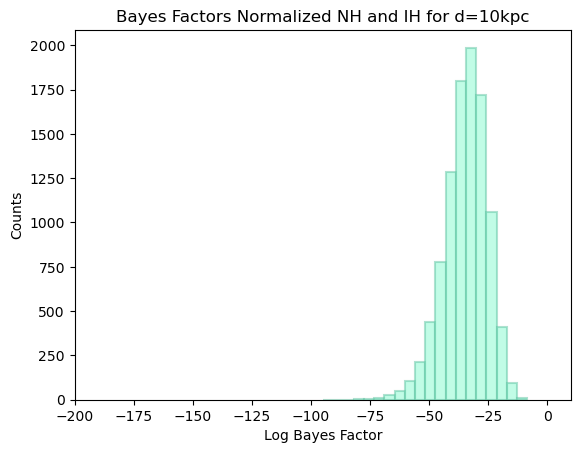

In [22]:
plt.hist(bfs10_norm, alpha=0.5, color='#84facf', edgecolor='#60c4a3', linewidth=1.5,bins=20)
plt.xlabel('Log Bayes Factor')
plt.ylabel('Counts')
plt.title('Bayes Factors Normalized NH and IH for d=10kpc')
plt.xlim(-200,10)